In [151]:
import networkx as nx

csv = 'resources/trump_graph.csv'

# Exercise 1
## Load CSV as Graph

In [152]:
G = nx.read_edgelist(csv, create_using=nx.Graph(), nodetype=int)

# Exercise 2
## Filter data

In [153]:
deg = G.degree
deg_min = 15
nodes = [k[0] for k in deg if k[1] >= deg_min]
G_simple = G.subgraph(nodes)

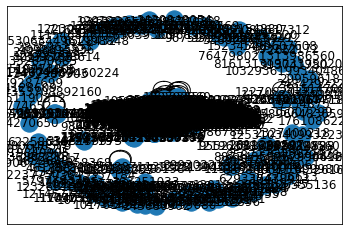

In [154]:
# Draw network
nx.draw_networkx(G_simple)

In [155]:
# Info of G
nx.info(G)

'Graph with 52087 nodes and 99231 edges'

In [156]:
# Info of G_simple
nx.info(G_simple)

'Graph with 1459 nodes and 9111 edges'

In [157]:
# Density of G
nx.density(G)

7.315213611657281e-05

In [158]:
# Density of G_simple
nx.density(G_simple)

0.008566101704476543

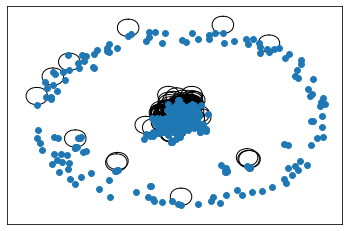

In [159]:
# Katz centrality
pos = nx.spring_layout(G_simple)
nx.draw_networkx(G_simple, pos=pos, with_labels=False, node_size=35)

# Exercise 3
## Retrieve connected components


In [160]:
# largest connected component
largest_connected_components = max(nx.connected_components(G_simple), key=len)
G_largest_connected_components = G.subgraph(largest_connected_components)
pos_lcc = nx.spring_layout(G_largest_connected_components)

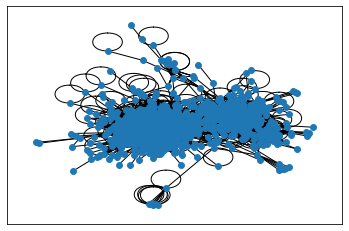

In [161]:
# Draw network
nx.draw_networkx(G_largest_connected_components, with_labels=False, node_size=35)

# Exercise 4
## Analyse node centrality

In [162]:
def sort_centrality(centrality):
    return sorted(centrality.items(), key=lambda x: x[1], reverse=True)

# Top centrality
top = 10

betweenness_centrality = nx.betweenness_centrality(G_largest_connected_components)
bt_sorted = sort_centrality(betweenness_centrality)[:top]
print(bt_sorted)

[(25073877, 0.3158140564725842), (939091, 0.08854426366507193), (1917731, 0.040582556932208025), (21619519, 0.02594563589976007), (822215679726100480, 0.025930835524576562), (750299424513990656, 0.024043320370602122), (4541141723, 0.020889899407087614), (2980625739, 0.020530544369436122), (2430341433, 0.01861432537129908), (29501253, 0.018367876696900216)]


In [163]:
bt_values = [0]*len(G_largest_connected_components.nodes())
bt_colors = [0]*len(G_largest_connected_components.nodes())

for index, bt_value in enumerate(bt_sorted[:top]):
    bt_values[index] = 1000*bt_value[1]
    bt_colors[index] = 2


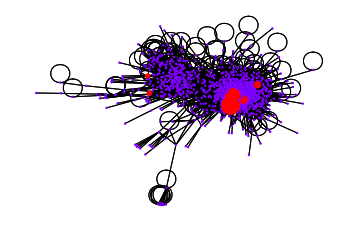

In [164]:
import matplotlib.pyplot as plt

plt.axis('off')
h = nx.draw_networkx(G_largest_connected_components, pos = pos_lcc,
    cmap = plt.get_cmap("rainbow"),
    node_color = [0]*len(G_largest_connected_components.nodes()),
    node_size = [2]*len(G_largest_connected_components.nodes()),
    with_labels = False)
# Dibujamos todos los puntos otra vez, pero ahora
# la mayoría tienen diámetro 0 y los 10 con mayor
# centralidad tienen diámetro proporcional a su valor
h = nx.draw_networkx(G_largest_connected_components, pos = pos_lcc,
    cmap = plt.get_cmap("rainbow"),
    node_color = bt_colors,
    node_size = bt_values,
    with_labels = False)


# Exercise 6
## SNA


In [165]:
import networkx.algorithms.community as nxcom

In [166]:
coms = nxcom.greedy_modularity_communities(G_largest_connected_components)

for id_c, c in enumerate(coms):
    for node in c:
        G_largest_connected_components.nodes[node]['community'] = id_c + 1

com_colors = []
for node in G_largest_connected_components.nodes:
    com_colors.append(G_largest_connected_components.nodes[node]['community'])

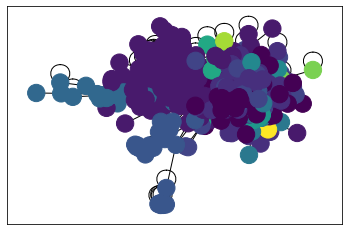

In [169]:
nx.draw_networkx(G_largest_connected_components, pos = pos_lcc, node_color=com_colors, with_labels = False)